# Read statistics about snapshots and plot linear parameters

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import sys
import os
import json
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 120
mpl.rcParams['figure.dpi'] = 120

### Specify suite of simulations to use and read metadata

In [2]:
basedir='../sim_suites/emulator_256_15072019/'
skewers_label='Ns256_wM0.05'
cube_json=basedir+'/latin_hypercube.json'
with open(cube_json) as json_file:  
    cube_data = json.load(json_file)
nsamples=cube_data['nsamples']
print('# samples =',nsamples)
# label identifying the particular skewer extraction (number of skewers per side and cell width in Mpc)

# samples = 50


### Get information from all models simulated (simulation pairs)

In [3]:
snap_arxiv = []
for sample in range(nsamples):
    # store parameters for simulation pair / model
    sim_params = cube_data['samples']['%d'%sample]
    print(sample,'sim params',sim_params)
    model_dict ={'sample':sample,'sim_param':sim_params}
    # read number of snapshots 
    pair_dir=basedir+'/sim_pair_%d'%sample
    pair_json=pair_dir+'/parameter.json'
    with open(pair_json) as json_file:  
        pair_data = json.load(json_file)
    #print(sample,'pair data',pair_data)
    zs=pair_data['zs']
    Nz=len(zs)
    for snap in range(Nz):        
        # make sure that we actually extracted skewers for this snapshot (z < zmax)
        plus_p1d_json=pair_dir+'/sim_plus/p1d_{}_{}.json'.format(snap,skewers_label)
        if not os.path.isfile(plus_p1d_json):
            print('do not have this snapshot',snap)
            continue
            
        # get linear power parameters describing snapshot
        linP = pair_data['linP_zs'][snap]
        snap_dict = {'model':model_dict,'snap':snap,'z':zs[snap],'linP':linP}  
        snap_arxiv.append(snap_dict)

0 sim params [0.392, -2.319, 2.757, -0.4500000000000002, 11.905000000000001]
1 sim params [0.268, -2.327, 1.0830000000000002, -1.41, 6.025]
2 sim params [0.276, -2.311, 1.191, -0.09000000000000008, 5.605]
3 sim params [0.376, -2.291, 0.813, -1.23, 9.805]
4 sim params [0.3, -2.289, 2.703, -1.35, 15.685]
5 sim params [0.38, -2.297, 2.487, 0.5700000000000003, 13.375]
6 sim params [0.324, -2.303, 1.5150000000000001, -0.20999999999999996, 14.005]
7 sim params [0.364, -2.313, 2.649, 1.3499999999999996, 11.275]
8 sim params [0.29200000000000004, -2.333, 0.489, 0.9900000000000002, 5.815]
9 sim params [0.396, -2.295, 1.893, 0.030000000000000027, 6.865]
10 sim params [0.42400000000000004, -2.307, 2.325, -0.75, 7.495]
11 sim params [0.41200000000000003, -2.271, 0.7050000000000001, 1.0499999999999998, 10.855]
12 sim params [0.284, -2.265, 2.811, -0.69, 12.955]
13 sim params [0.404, -2.263, 2.5949999999999998, -0.030000000000000027, 7.285]
14 sim params [0.4, -2.255, 2.109, 0.5100000000000002, 10.2

In [4]:
Ntot=len(snap_arxiv)
# linear parameters at z_star=3
Delta2_star=np.array([snap_arxiv[i]['model']['sim_param'][1] for i in range(Ntot)])
Om_star=np.array([snap_arxiv[i]['model']['sim_param'][1] for i in range(Ntot)])
# linear parameters at the snapshot
Delta2_p=np.array([snap_arxiv[i]['linP']['Delta2_p'] for i in range(Ntot)])
n_p=np.array([snap_arxiv[i]['linP']['n_p'] for i in range(Ntot)])
alpha_p=np.array([snap_arxiv[i]['linP']['alpha_p'] for i in range(Ntot)])
f_p=np.array([snap_arxiv[i]['linP']['f_p'] for i in range(Ntot)])
z=np.array([snap_arxiv[i]['z'] for i in range(Ntot)])

Text(0.5, 1.0, 'Amplitude of linear power in snapshots')

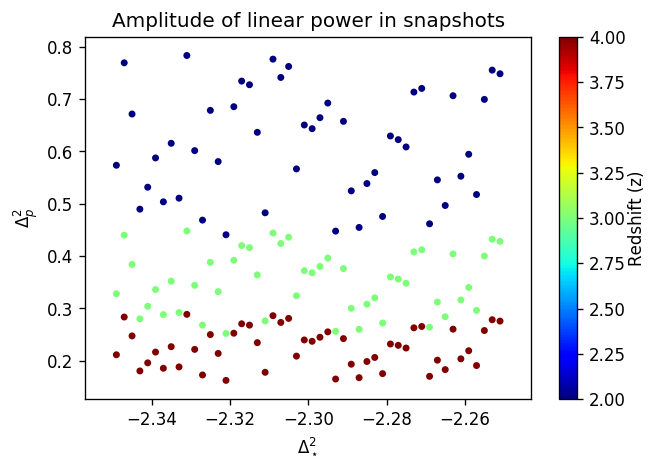

In [5]:
plt.figure()
plt.scatter(Delta2_star,Delta2_p,c=z,s=10,cmap=mpl.cm.jet)
cbar= plt.colorbar()
cbar.set_label("Redshift (z)", labelpad=+1)
plt.xlabel(r'$\Delta_\star^2$')
plt.ylabel(r'$\Delta_p^2$')
plt.title('Amplitude of linear power in snapshots')

Text(0.5, 1.0, 'Logarithmic growth rate in each snapshot')

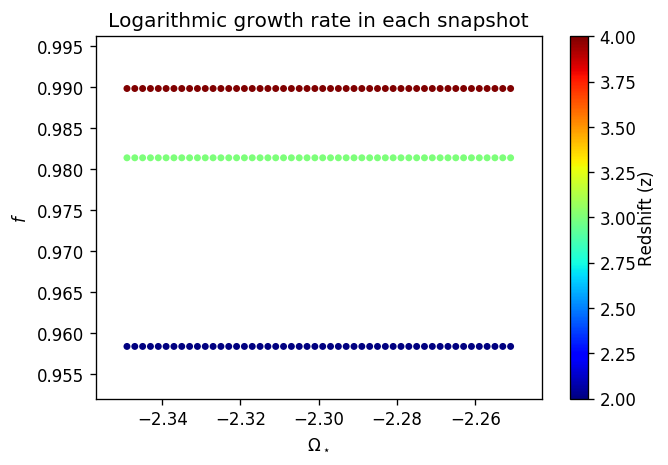

In [6]:
plt.figure()
plt.scatter(Om_star,f_p,c=z,s=10,cmap=mpl.cm.jet)
cbar= plt.colorbar()
cbar.set_label("Redshift (z)", labelpad=+1)
plt.xlabel(r'$\Omega_\star$')
plt.ylabel(r'$f$')
plt.title('Logarithmic growth rate in each snapshot')

Text(0.5, 1.0, 'Shape of primordial power in each snapshot')

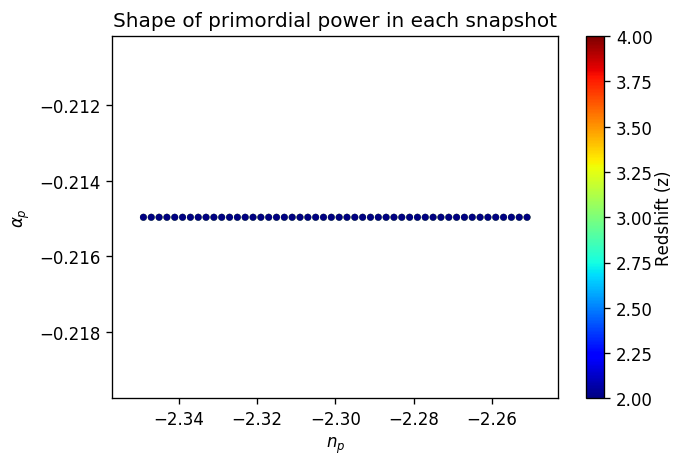

In [7]:
plt.figure()
plt.scatter(n_p,alpha_p,c=z,s=10,cmap=mpl.cm.jet)
cbar= plt.colorbar()
cbar.set_label("Redshift (z)", labelpad=+1)
plt.xlabel(r'$n_p$')
plt.ylabel(r'$\alpha_p$')
plt.title('Shape of primordial power in each snapshot')